# Import required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Problem statment

In [ ]:
#Initialize reservoir and fluid parameters
k = 150. #md
h = 100. #ft
PRg = 4000. #psi
Pwfg= 3600. #psi
Re = 2500. #ft
Rw = 0.33 #ft
Temp = 110. #DegC #[Hint-1] convert from Degree C to Degree R

Skin = 6 #Dimensionless
D = 4.3E-5 #Dimensionless
#PVT Table
GasPVT = {'PwfGasRange': [4000, 3897, 3500, 3000, 2500, 2000, 1500, 1000, 500, 14.7],
          'Zfact': [0.9539, 0.9476, 0.9295, 0.9121, 0.9022, 0.9013, 0.9106, 0.9301, 0.9596, 0.9986],
          'GasVisc': [0.024, 0.0236, 0.022, 0.02, 0.0182, 0.0166, 0.0153, 0.0144, 0.0137, 0.0132],
          'GasBg': [0.004769, 0.004863, 0.005301, 0.006056, 0.007175, 0.008946, 0.012034, 0.018424, 0.038039, 1.35459]
         }

# Answer
## Build IPR, and AOF
No function is needed for converting a constant

In [3]:
T = Temp * 9/5 + 491.67
df = pd.DataFrame(GasPVT)
df

,PwfGasRange,Zfact,GasVisc,GasBg
0,4000.0,0.9539,0.0240,0.004769
1,3897.0,0.9476,0.0236,0.004863
2,3500.0,0.9295,0.0220,0.005301
3,3000.0,0.9121,0.0200,0.006056
4,2500.0,0.9022,0.0182,0.007175
5,2000.0,0.9013,0.0166,0.008946
6,1500.0,0.9106,0.0153,0.012034
7,1000.0,0.9301,0.0144,0.018424
8,500.0,0.9596,0.0137,0.038039
9,14.7,0.9986,0.0132,1.354590


- Pandas object works like numpy object. Iterate over the row or any index make the program run slower (incase dealing with big data). Try to use **vectorization** in numpy, pandas, etc if possible.

- Try not to copy a variable if already stored in an object (as long as possible). Memory management is importang when dealing with big data.

- Disclaimer : Ask bang feldy for the proper workflow finding gas rate. Those three lines below were taken from eq 29, 30, and 7. Anyway Latex markdown can be used for graph title in matplotlib.

$$
  a = \frac{1422 \mu z T \left( \ln \frac {r_e}{r_w} - 0.75 + s \right)}{kh} 
$$ 

$$
  b = \frac{1422 \mu z T}{kh} D
$$

$$
    \overline{P_R}^2 - P_{wf}^2 = aq_g + bq_q^2
$$
-  Below code to emphasize that someone can write code as short as possible but still honoring readibility and efficiency.

- IPR is built and AOF can be interpreted

In [6]:
%%timeit
df['coef a'] = (1422. * df['GasVisc'] * df['Zfact'] * T * (np.log(Re/Rw) - 0.75 + Skin)) / (k* h)
df['coef b'] = (1422. * df['GasVisc'] * df['Zfact'] * T * D) / (k* h)
df['gas rate'] = (- df['coef a'] + np.sqrt (df['coef a']**2 + 4*df['coef b'] * (PRg**2 - df['PwfGasRange']**2))) / \
(2 * df['coef b'])
df

9.5 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


This graph is not a good example for showing result to audience. Try using proper figsize, title, marker & line, etc.

In [ ]:
df.plot.scatter('gas rate', 'PwfGasRange')
plt.title('IPR')
plt.show()

## Complimentary material -  how to make regression using numpy
You can use numpy, scikit, pandas, or whatever regression tools available in python.

Note : i flipped the order from np.polyfit result to make y calculation easier later. 
Source : https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [ ]:
regress = np.polyfit(df['gas rate'], df['PwfGasRange'],2)
regress = regress[::-1]

In [ ]:
x = np.linspace(0., 513000., 200)
y = np.zeros_like(x)
for _ in range(len(regress)):
    y += regress[_]*x**_ 
plt.scatter(df['gas rate'], df['PwfGasRange'])
plt.plot(x,y)

20% gas rate dari $P_{rg}$ cari sendiri ya. 

   PwfGasRange   Zfact  GasVisc     GasBg  Qg
0       4000.0  0.9539   0.0240  0.004769   0
1       3897.0  0.9476   0.0236  0.004863   0
2       3500.0  0.9295   0.0220  0.005301   0
3       3000.0  0.9121   0.0200  0.006056   0
4       2500.0  0.9022   0.0182  0.007175   0
5       2000.0  0.9013   0.0166  0.008946   0
6       1500.0  0.9106   0.0153  0.012034   0
7       1000.0  0.9301   0.0144  0.018424   0
8        500.0  0.9596   0.0137  0.038039   0
9         14.7  0.9986   0.0132  1.354590   0
   PwfGasRange   Zfact  GasVisc     GasBg             Qg
0       4000.0  0.9539   0.0240  0.004769       0.000000
1       3897.0  0.9476   0.0236  0.004863   35404.919829
2       3500.0  0.9295   0.0220  0.005301  139050.050909
3       3000.0  0.9121   0.0200  0.006056  239589.211721
4       2500.0  0.9022   0.0182  0.007175  323249.659188
5       2000.0  0.9013   0.0166  0.008946  393967.598665
6       1500.0  0.9106   0.0153  0.012034  449963.893750
7       1000.0  0.9301   0.0144  0.018

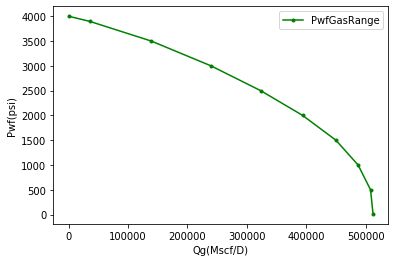

 Q at Pwf 800psi =  495668.2596396 Mscf/D
AOF = 512387.3016901217 Mscf/D


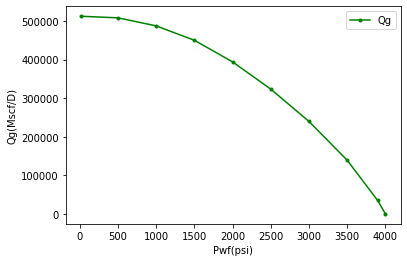

In [7]:


import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import math as math


#Initialize reservoir and fluid parameters
k = 150 #md
h = 100 #ft
PRg = 4000 #psi
Pwfg = 3600 #psi
Re = 2500 #ft
Rw = 0.33 #ft
Temp = 110 #DegC
Skin = 6 #Dimensionless
D = 4.3E-5 #Dimensionless



#PVT Table
GasPVT = {'PwfGasRange': [4000, 3897, 3500, 3000, 2500, 2000,
1500, 1000, 500, 14.7],
         'Zfact':[0.9539, 0.9476, 0.9295, 0.9121, 0.9022, 0.9013,
0.9106, 0.9301, 0.9596, 0.9986],
         'GasVisc': [0.024, 0.0236, 0.022, 0.02, 0.0182, 0.0166, 
0.0153, 0.0144, 0.0137, 0.0132],
         'GasBg': [0.004769, 0.004863, 0.005301, 0.006056, 0.007175,
0.008946, 0.012034, 0.018424, 0.038039, 1.35459],
         'Qg': [0,0,0,0,0,0,0,0,0,0]}
df = pd.DataFrame(GasPVT, columns = ['PwfGasRange','Zfact','GasVisc','GasBg','Qg'])
print(df)


#Define Function
def GasFlowRate (k, h, Pr, Pwf, GasVisc, Z, T, re, rw, s, D, qgTebak):
    
    T=(T*9/5)+32+460 #degC Convert to R
    
    GasFlowRate = (k*h*(Pr**2-Pwf**2))/(1422*GasVisc*Z*T*(math.log(re/rw)-3/4+s+(D*qgTebak)))
    error = abs((GasFlowRate-qgTebak)/qgTebak)
    while (error>0.00000000001):
        qgTebak = GasFlowRate
        GasFlowRate = (k*h*(Pr**2-Pwf**2))/(1422*GasVisc*Z*T*(math.log(re/rw)-3/4+s+(D*qgTebak)))
        error = abs((GasFlowRate-qgTebak)/qgTebak)
    return GasFlowRate





In [9]:
%%timeit
for i in range (1,10):
    df.loc[i,'Qg']=GasFlowRate(k,h,PRg,df.loc[i,'PwfGasRange'],df.loc[i,'GasVisc'],df.loc[i,'Zfact'],Temp,Re,Rw,Skin,D,1000)
df


9.04 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
for i in range (1,10):
    df.loc[i,'Qg']=GasFlowRate(k,h,PRg,df.loc[i,'PwfGasRange'],df.loc[i,'GasVisc'],df.loc[i,'Zfact'],Temp,Re,Rw,Skin,D,1000)
print(df)

df.plot(kind='line', x='Qg', y='PwfGasRange', color='green', style='.-')
plt.xlabel('Qg(Mscf/D)')
plt.ylabel('Pwf(psi)')
plt.show()



#Using interpolation method 
Qgas = ((800-500)/(1000-500))*(487289.767384-508235.998023)+508235.998023
print(' Q at Pwf 800psi = ',Qgas,'Mscf/D')


print('AOF =',df.loc[9,'Qg'],'Mscf/D')

df.plot(kind='line', y='Qg', x='PwfGasRange', color='green', style='.-')
plt.ylabel('Qg(Mscf/D)')
plt.xlabel('Pwf(psi)')
plt.show()